In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:

# Load dataset
file_path = r"E:\Capstone_project_25\dataset_balanced_with_SMOTE.csv"  # Update path if needed
df = pd.read_csv(file_path)


In [3]:

# Handle categorical features (if any)
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [4]:

# Define features (X) and target (y)
X = df.drop(columns=["landslide_occurred"])  # Drop target variable
y = df["landslide_occurred"]


In [5]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

# Train XGBoost model
xgb_model = xgb.XGBClassifier(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)
xgb_model.fit(X_train, y_train)


C:\Users\Harshita Mehta\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [03:47:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, min_samples_leaf=4, min_samples_split=10,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=300, n_jobs=None, ...)

Feature Selection for XGBoost Model based on feature importance score.

In [7]:

# Get feature importance scores
feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})


In [8]:

# Sort and visualize feature importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)


C:\Users\Harshita Mehta\AppData\Local\Temp\ipykernel_14124\1865928297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")


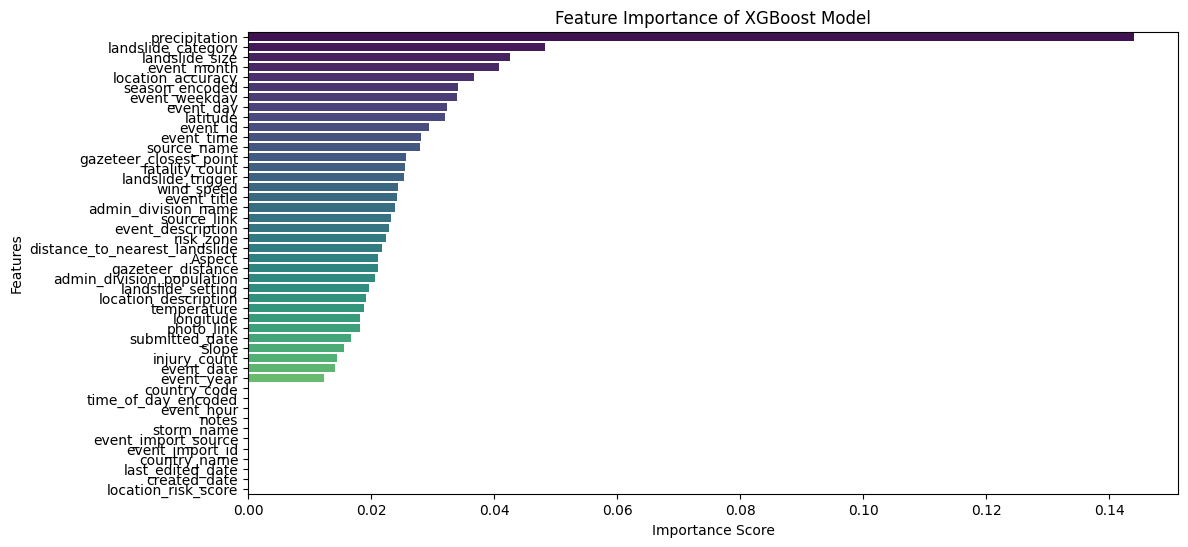

In [9]:

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")
plt.title("Feature Importance of XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
